In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [0]:
%matplotlib inline

In [0]:
df_swing = pd.read_csv('https://raw.githubusercontent.com/mohammad0alfares/EDA/master/Labs/data/2008_swing_states.csv')


In [6]:
df_swing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 15 columns):
year                           3154 non-null int64
state                          3154 non-null object
county                         3154 non-null object
fips                           3154 non-null object
vote_rep                       3154 non-null int64
vote_dem                       3154 non-null int64
vote_oth                       3154 non-null int64
vote_total                     3154 non-null int64
pct_rep                        3154 non-null float64
pct_dem                        3154 non-null float64
pct_oth                        3154 non-null float64
winner                         3154 non-null object
runnerup                       3154 non-null object
pct_winner                     3154 non-null float64
margin_winner_over_runnerup    3154 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 369.7+ KB


In [7]:
df_swing.head()

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
0,2008,AL,Autauga County,1001,17403,6093,145,23641,73.6,25.8,0.6,rep,dem,73.6,47.8
1,2008,AL,Baldwin County,1003,61271,19386,756,81413,75.3,23.8,0.9,rep,dem,75.3,51.5
2,2008,AL,Barbour County,1005,5866,5697,67,11630,50.4,49.0,0.6,rep,dem,50.4,1.4
3,2008,AL,Bibb County,1007,6262,2299,83,8644,72.4,26.6,1.0,rep,dem,72.4,45.8
4,2008,AL,Blount County,1009,20389,3522,356,24267,84.0,14.5,1.5,rep,dem,84.0,69.5


In [8]:
df_swing[['state','county','vote_total','vote_rep','vote_dem','pct_dem']]

,state,county,vote_total,vote_rep,vote_dem,pct_dem
0,AL,Autauga County,23641,17403,6093,25.80
1,AL,Baldwin County,81413,61271,19386,23.80
2,AL,Barbour County,11630,5866,5697,49.00
3,AL,Bibb County,8644,6262,2299,26.60
4,AL,Blount County,24267,20389,3522,14.50
...,...,...,...,...,...,...
3149,AK,"State House District 36, Kodiak",6673,4201,2264,33.93
3150,AK,"State House District 37, Bristol Bay-Aleuti",4665,2661,1868,40.04
3151,AK,"State House District 38, Bethel",4820,2056,2549,52.88
3152,AK,"State House District 39, Bering Straits",5184,2323,2695,51.99


In [9]:
df_swing[['state', 'county', 'pct_dem']]

,state,county,pct_dem
0,AL,Autauga County,25.80
1,AL,Baldwin County,23.80
2,AL,Barbour County,49.00
3,AL,Bibb County,26.60
4,AL,Blount County,14.50
...,...,...,...
3149,AK,"State House District 36, Kodiak",33.93
3150,AK,"State House District 37, Bristol Bay-Aleuti",40.04
3151,AK,"State House District 38, Bethel",52.88
3152,AK,"State House District 39, Bering Straits",51.99


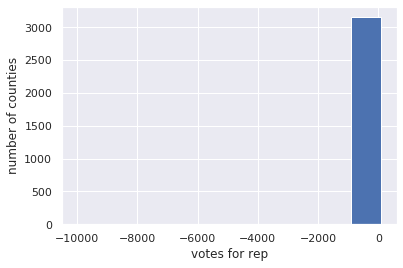

In [10]:
sns.set()
_=plt.hist(df_swing['pct_rep'])
_=plt.xlabel('votes for rep')
_=plt.ylabel('number of counties')
plt.show()


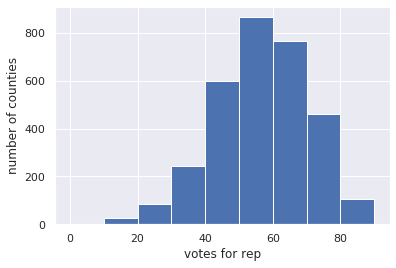

In [11]:
bin_edges = range(0,100,10) #[0,20,30,40,50,60,70,80,90,100]
sns.set()
_=plt.hist(df_swing['pct_rep'],bins=bin_edges)
_=plt.xlabel('votes for rep')
_=plt.ylabel('number of counties')
plt.show()

In [12]:
df_OH=df_swing[df_swing.state == 'OH']
df_PA=df_swing[df_swing.state == 'PA']
df_FL=df_swing[df_swing.state == 'FL']
df_states=df_OH
df_states=df_states.append(df_PA)
df_states=df_states.append(df_FL)

df_states.state.value_counts()



OH    88
FL    67
PA    67
Name: state, dtype: int64

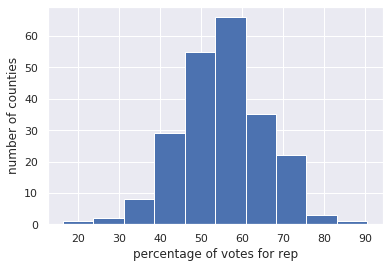

In [13]:
sns.set()
plot = plt.hist(df_states['pct_rep'])
plot = plt.xlabel('percentage of votes for rep')
plot = plt.ylabel('number of counties')
plt.show()

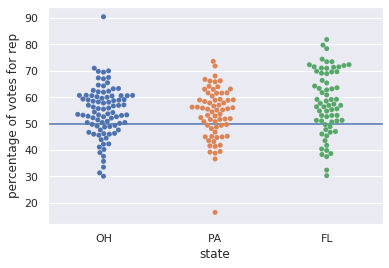

In [15]:
_ = sns.swarmplot(x='state', y='pct_rep', data=df_states)
_= plt.xlabel('state')
_= plt.ylabel('percentage of votes for rep')
_= plt.axhline(50)  
plt.show()


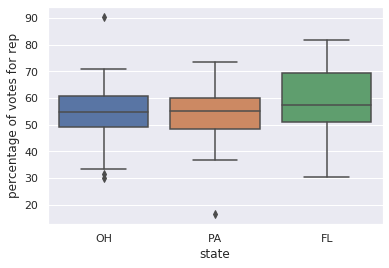

In [18]:
_= sns.boxplot(x='state', y='pct_rep', data=df_states)
_= plt.xlabel('state')
_= plt.ylabel('percentage of votes for rep')
plt.show()

In [0]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

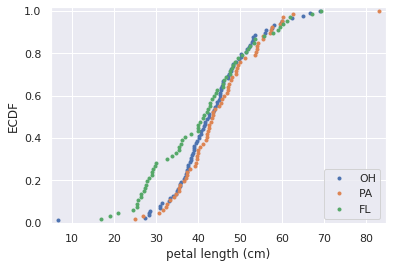

In [0]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_OH, y_OH = ecdf(df_OH['pct_dem'])
x_PA, y_PA = ecdf(df_PA['pct_dem'])
x_FL, y_FL = ecdf(df_FL['pct_dem'])

# Generate plot
_ = plt.plot(x_OH, y_OH, marker='.', linestyle='none')
_ = plt.plot(x_PA, y_PA, marker='.', linestyle='none')
_ = plt.plot(x_FL, y_FL, marker='.', linestyle='none')
# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.legend(('OH', 'PA', 'FL'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [0]:
df_states=df_states[['state','vote_total','vote_rep','vote_dem','pct_dem']];
df_states.describe()

,vote_total,vote_rep,vote_dem,pct_dem
count,222.000000,222.000000,222.000000,222.000000
mean,90424.513514,42236.567568,47214.283784,43.114595
std,142285.290653,56208.862490,88913.077046,10.602505
min,2245.000000,1323.000000,642.000000,6.600000
25%,16537.250000,9203.750000,6337.500000,36.605000
50%,32491.000000,18050.500000,14392.000000,42.640000
75%,95516.750000,50651.750000,41623.000000,49.182500
max,863486.000000,360551.000000,595980.000000,83.080000


In [0]:
df_states.mean()

vote_total    90424.513514
vote_rep      42236.567568
vote_dem      47214.283784
pct_dem          43.114595
dtype: float64

In [0]:
df_states.median()

vote_total    32491.00
vote_rep      18050.50
vote_dem      14392.00
pct_dem          42.64
dtype: float64

In [0]:
np.percentile(df_states['pct_dem'], [25,50,75])

array([36.605 , 42.64  , 49.1825])

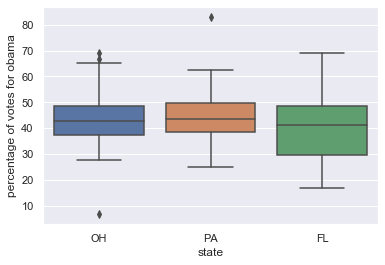

In [0]:
sns.boxplot(x='state', y='pct_dem', data=df_states)
plt.xlabel('state')
plt.ylabel('percentage of votes for obama')
plt.show()
#annotate percentiles and outliers
#calculate if outliers

In [0]:
np.var(df_states['pct_dem'])

111.90675006087173

Text(0, 0.5, 'percentage of votes for obama')

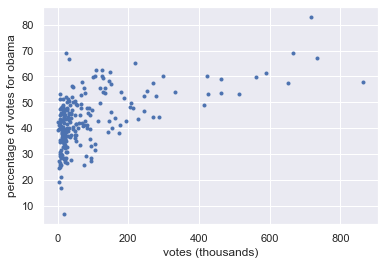

In [0]:
#scatter plot
plt.plot(df_states['vote_total']/1000, df_states['pct_dem'], marker='.', linestyle='none')
plt.xlabel('votes (thousands)')
plt.ylabel('percentage of votes for obama')